In [ ]:
# HR Analytics - Predict Employee Attrition


In [ ]:
import pandas as pd
df = pd.read_csv('/content/Attrition.csv')


In [ ]:
df.shape


(1470, 35)

In [ ]:
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
#Quick cleaning
df['Attrition_Flag'] = df['Attrition'].astype(str).str.strip().str.lower().eq('yes').astype(int)


In [ ]:
if 'EmployeeNumber' not in df.columns:
    df['EmployeeID'] = df.index.astype(str)
else:
    df.rename(columns={'EmployeeNumber':'EmployeeID'}, inplace=True)


In [ ]:
# Exploratory queries

In [ ]:
  # overall attrition rate
total = len(df)
attritions = df['Attrition_Flag'].sum()
attrition_rate = attritions/total
print(f"Overall attrition rate: {attrition_rate:.3f} ({attritions}/{total})")

Overall attrition rate: 0.161 (237/1470)


In [ ]:
# department-wise attrition
if 'Department' in df.columns:
    dept = df.groupby('Department')['Attrition_Flag'].agg(['count','sum','mean']).rename(columns={'mean':'AttritionRate'})
    dept = dept.sort_values('AttritionRate', ascending=False)
    display(dept)

,count,sum,AttritionRate
Department,,,
Sales,446,92,0.206278
Human Resources,63,12,0.190476
Research & Development,961,133,0.138398


In [ ]:
# jobrole-wise attrition
if 'JobRole' in df.columns:
    display(df.groupby('JobRole')['Attrition_Flag'].mean().sort_values(ascending=False))


,Attrition_Flag
JobRole,
Sales Representative,0.397590
Laboratory Technician,0.239382
Human Resources,0.230769
Sales Executive,0.174847
Research Scientist,0.160959
Manufacturing Director,0.068966
Healthcare Representative,0.068702
Manager,0.049020
Research Director,0.025000


In [ ]:
# overtime vs attrition
if 'OverTime' in df.columns:
    display(pd.crosstab(df['OverTime'], df['Attrition']).apply(lambda r: r/r.sum(), axis=1))


Attrition,No,Yes
OverTime,,
No,0.895636,0.104364
Yes,0.694712,0.305288


In [ ]:
# income bands (quantile)
if 'MonthlyIncome' in df.columns:
    df['IncomeBand'] = pd.qcut(df['MonthlyIncome'], q=5, duplicates='drop')
    display(df.groupby('IncomeBand')['Attrition_Flag'].mean().sort_values(ascending=False))

/tmp/ipython-input-2155325803.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(df.groupby('IncomeBand')['Attrition_Flag'].mean().sort_values(ascending=False))


,Attrition_Flag
IncomeBand,
"(1008.999, 2695.8]",0.312925
"(2695.8, 4228.8]",0.170068
"(5743.4, 9860.0]",0.125850
"(4228.8, 5743.4]",0.105442
"(9860.0, 19999.0]",0.091837


In [ ]:
# promotions effect
for col in ['YearsSinceLastPromotion','YearsAtCompany','YearsInCurrentRole']:
    if col in df.columns:
        display(df.groupby(col)['Attrition_Flag'].mean().rename(col + '_AttrRate'))


,YearsSinceLastPromotion_AttrRate
YearsSinceLastPromotion,
0,0.189329
1,0.137255
2,0.169811
3,0.173077
4,0.081967
5,0.044444
6,0.187500
7,0.210526
8,0.000000


,YearsAtCompany_AttrRate
YearsAtCompany,
0,0.363636
1,0.345029
2,0.212598
3,0.156250
4,0.172727
5,0.107143
6,0.118421
7,0.122222
8,0.112500


,YearsInCurrentRole_AttrRate
YearsInCurrentRole,
0,0.299180
1,0.192982
2,0.182796
3,0.118519
4,0.144231
5,0.027778
6,0.054054
7,0.139640
8,0.078652


In [ ]:
#  plots (matplotlib/seaborn)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


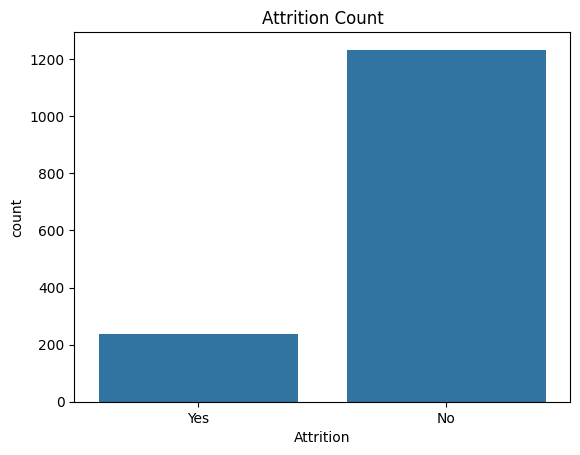

In [ ]:
# class balance
sns.countplot(x='Attrition', data=df)
plt.title('Attrition Count')
plt.show()


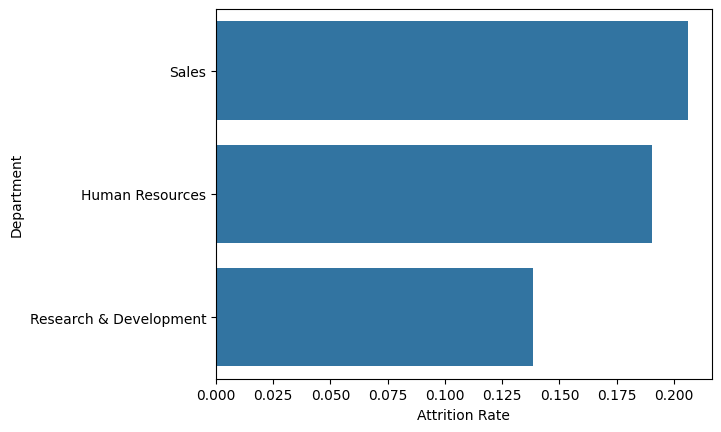

In [ ]:
# Attrition rate by Department (bar)
if 'Department' in df.columns:
    dept = df.groupby('Department')['Attrition_Flag'].mean().reset_index()
    sns.barplot(x='Attrition_Flag', y='Department', data=dept.sort_values('Attrition_Flag', ascending=False))
    plt.xlabel('Attrition Rate'); plt.show()


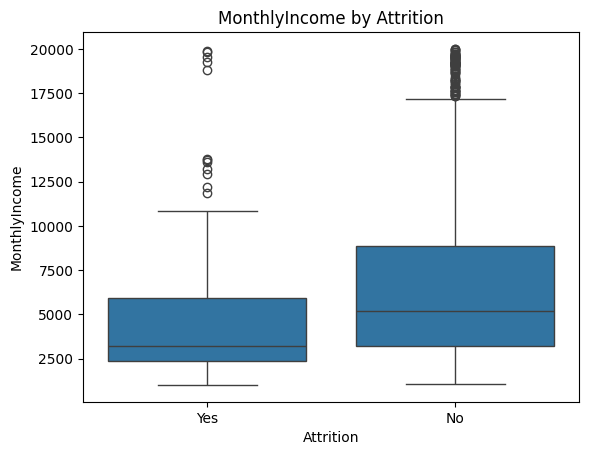

In [ ]:
# Income distribution by Attrition
if 'MonthlyIncome' in df.columns:
    sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
    plt.title('MonthlyIncome by Attrition')
    plt.show()


In [ ]:
# Age bands
if 'Age' in df.columns:
    df['AgeBand'] = pd.cut(df['Age'], bins=[17,25,35,45,55,100], labels=['18-25','26-35','36-45','46-55','56+'])


In [ ]:
if 'MonthlyIncome' in df.columns and 'IncomeBand' not in df.columns:
    df['IncomeBand'] = pd.qcut(df['MonthlyIncome'], q=5, labels=False, duplicates='drop')


In [ ]:
# Convert OverTime to 0/1
if 'OverTime' in df.columns:
    df['OverTime_Flag'] = df['OverTime'].astype(str).str.strip().str.lower().map({'yes':1,'no':0}).fillna(0).astype(int)


In [ ]:
# Example derived feature: tenure / promotions gap
if 'YearsAtCompany' in df.columns and 'YearsSinceLastPromotion' in df.columns:
    df['YearsSinceProm_Ratio'] = (df['YearsSinceLastPromotion']+1) / (df['YearsAtCompany']+1)


In [ ]:
# Prepare X / y and train/test split

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X = df.drop(columns=['Attrition','Attrition_Flag','EmployeeID'], errors='ignore')
y = df['Attrition_Flag']


In [ ]:
# stratify to preserve class balance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [ ]:
#Build preprocessing pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler


In [ ]:
num_cols = X.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object','category']).columns.tolist()


In [ ]:
numeric_transformer = Pipeline([
  ('imputer', SimpleImputer(strategy='median')),
  ('scaler', StandardScaler(with_mean=False))
])


In [ ]:
categorical_transformer = Pipeline([
  ('imputer', SimpleImputer(strategy='most_frequent')),
  ('ohe', OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
preprocessor = ColumnTransformer(transformers=[
  ('num', numeric_transformer, num_cols),
  ('cat', categorical_transformer, cat_cols)
], remainder='drop')


In [ ]:
# Train models (Logistic Regression + Decision Tree)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import joblib
from sklearn.utils.class_weight import compute_class_weight


In [ ]:
import numpy as np

In [ ]:
# compute class weights
classes = np.unique(y_train)
cw = compute_class_weight('balanced', classes=classes, y=y_train)
class_weight = {int(c): w for c,w in zip(classes,cw)}


In [ ]:
# Logistic Regression pipeline
logreg_pipe = Pipeline([('pre', preprocessor),
                        ('clf', LogisticRegression(max_iter=2000, class_weight=class_weight))])
logreg_pipe.fit(X_train, y_train)


Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler(with_mean=False))]),
                                                  ['Age', 'DailyRate',
                                                   'DistanceFromHome',
                                                   'Education', 'EmployeeCount',
                                                   'EnvironmentSatisfaction',
                                                   'HourlyRate',
                                                   'JobInvolvement', 'JobLevel',
                                                   'JobSatisfaction',
                                                   'MonthlyIncome',
                                                   'MonthlyRate',
                                                   '...
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['BusinessTravel',
                                                   'Department',
                                                   'EducationField', 'Gender',
                                                   'JobRole', 'MaritalStatus',
                                                   'Over18', 'OverTime',
                                                   'IncomeBand',
                                                   'AgeBand'])])),
                ('clf',
                 LogisticRegression(class_weight={0: np.float64(0.5963488843813387),
                                                  1: np.float64(3.094736842105263)},
                                    max_iter=2000))])

In [ ]:
# Decision Tree pipeline
tree_pipe = Pipeline([('pre', preprocessor),
                      ('clf', DecisionTreeClassifier(random_state=42, max_depth=6))])
tree_pipe.fit(X_train, y_train)


Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler(with_mean=False))]),
                                                  ['Age', 'DailyRate',
                                                   'DistanceFromHome',
                                                   'Education', 'EmployeeCount',
                                                   'EnvironmentSatisfaction',
                                                   'HourlyRate',
                                                   'JobInvolvement', 'JobLevel',
                                                   'JobSatisfaction',
                                                   'MonthlyIncome',
                                                   'MonthlyRate',
                                                   '...
                                                   'OverTime_Flag',
                                                   'YearsSinceProm_Ratio']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['BusinessTravel',
                                                   'Department',
                                                   'EducationField', 'Gender',
                                                   'JobRole', 'MaritalStatus',
                                                   'Over18', 'OverTime',
                                                   'IncomeBand',
                                                   'AgeBand'])])),
                ('clf', DecisionTreeClassifier(max_depth=6, random_state=42))])

In [ ]:
# Evaluate models - Accuracy Report + Confusion Matrix

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Predictions
y_pred = logreg_pipe.predict(X_test)

In [ ]:
# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)


Accuracy: 0.7619047619047619


In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)


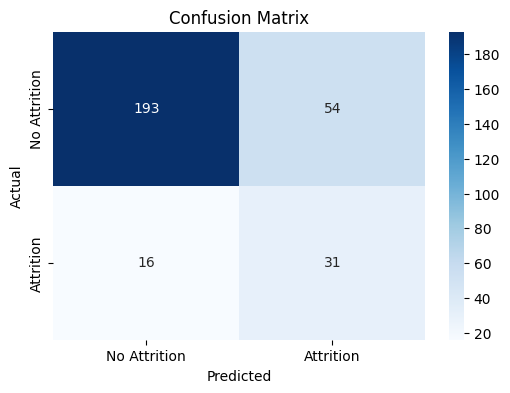

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["No Attrition","Attrition"], yticklabels=["No Attrition","Attrition"])
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()


In [ ]:
# Classification Report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.92      0.78      0.85       247
           1       0.36      0.66      0.47        47

    accuracy                           0.76       294
   macro avg       0.64      0.72      0.66       294
weighted avg       0.83      0.76      0.79       294



In [ ]:
# SHAP Value Analysis – Explain Model Predictions

In [ ]:
import shap

# Explain model (Logistic Regression or Tree)
X_test_processed = preprocessor.transform(X_test)
explainer = shap.Explainer(logreg_pipe.named_steps['clf'], X_test_processed)
shap_values = explainer(X_test_processed)

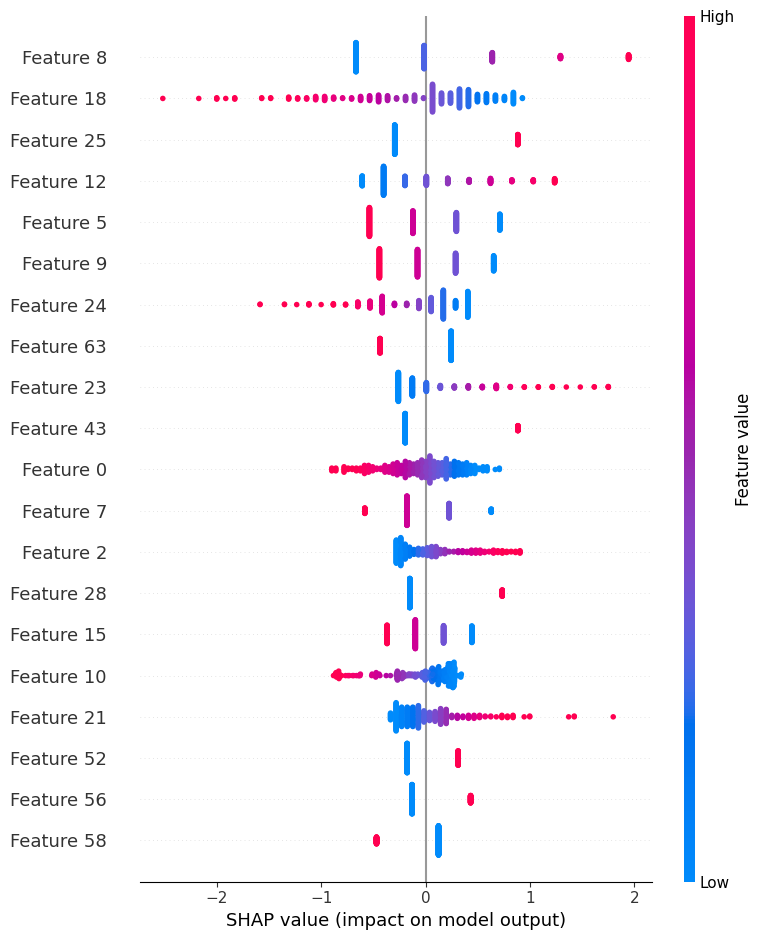

In [ ]:
import os

# Summary plot
if not os.path.exists('outputs'):
    os.makedirs('outputs')
shap.summary_plot(shap_values, X_test_processed, show=False)
plt.savefig("outputs/shap_summary.png")

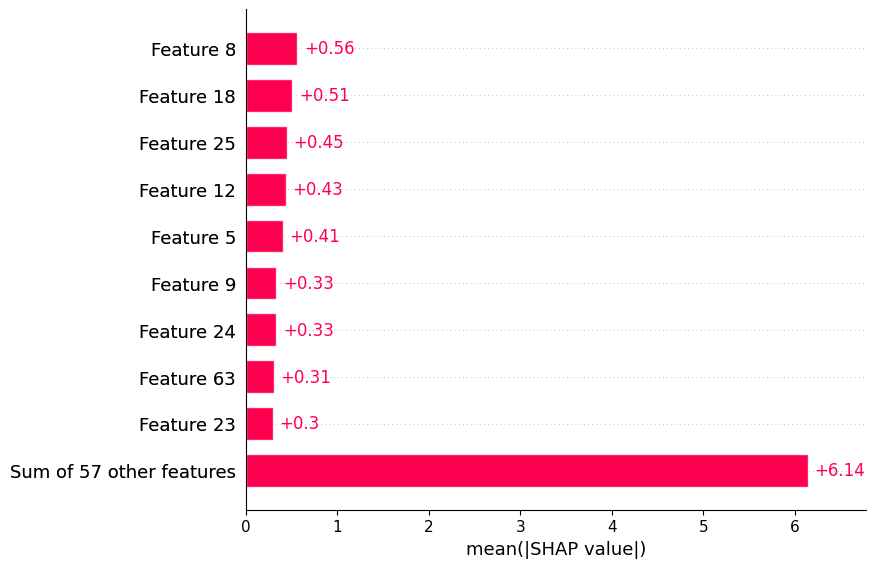

In [ ]:
# Bar plot of feature importance
shap.plots.bar(shap_values, show=False)
plt.savefig("outputs/shap_feature_importance.png")


In [ ]:
import pandas as pd
# Get the feature names from the preprocessor
feature_names = preprocessor.get_feature_names_out()

importance = pd.DataFrame({
    "Feature": feature_names,
    "Importance": np.abs(shap_values.values).mean(axis=0)
}).sort_values(by="Importance", ascending=False)

importance.to_csv("outputs/shap_feature_importance.csv", index=False)
display(importance.head())

,Feature,Importance
8,num__JobLevel,0.561946
18,num__TotalWorkingYears,0.507439
25,num__OverTime_Flag,0.447080
12,num__NumCompaniesWorked,0.434558
5,num__EnvironmentSatisfaction,0.408337
